# UMAP Plotting  (IE)


## Imports

In [1]:
import sys 
import os
import pathlib
print(sys.version)

utils_path = pathlib.Path(os.getcwd() + '/utils')  # i suspect this one is not needed
print(utils_path.exists())
print(os.getcwd())
#sys.path.append(str(utils_path))  # may not be necessary
#sys.path.append(os.getcwd())  # i thnk this is the one that works 
sys.path.append('../') # this one is one level up so we can see the utils lib
print(sys.path)

import numpy as np
import sklearn
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from utils.data import Data
from utils.config import Config

3.6.9 (default, Jul  3 2019, 15:36:16) 
[GCC 5.4.0 20160609]
True
/home/mutaz/ilab1
['/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '', '/home/mutaz/.local/lib/python3.6/site-packages', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/home/mutaz/.local/lib/python3.6/site-packages/IPython/extensions', '/home/mutaz/.ipython', '../']


In [2]:
## plotting functions

In [3]:
def plot_umaps(plot_df, colorby, title=None, filename=None):
    n = plot_df.shape[0]
    for i, c in enumerate(colorby):
        plt.figure(figsize=(20,10))
        plt.subplot(1,2,i+1)
        #plt.figure(figsize=(10, 10))
        plt.scatter(data=plot_df, x='x', y='y', c=c, alpha=.1)
        plt.gca().set_aspect('equal', 'datalim')
        plt.title(f'UMAP {colorby[0]} projection\n 300K features \n({c},{n})', fontsize=24);
        plt.axis('off')
        plt.colorbar()
        #plt.savefig(f'plots/300K_{colorby[0]}_umap_{n}_samples_colorby_{c}.png', transparent=True)

In [4]:
def plot_umap(plot_df, colorby, filename=None):
    plt.figure(figsize=(10, 10))
    sns.scatterplot(
        x='x', y='y',
        hue=colorby,
        palette=sns.color_palette("husl", 2),
        data=plot_df,
        alpha=0.9
    )
    plt.legend(loc='upper left')
    plt.axis('off')
    #plt.savefig(f'plots/300K_{colorby[0]}_umap_{n}_samples_colorby_commensurate_bool.png', transparent=True)
    plt.show()

In [5]:
def plot_umap_v2(plot_df, colorby, imagename=None):
    plt.figure(figsize=(10, 10))
    sns.scatterplot(
        x='x', y='y',
        palette=sns.color_palette("husl", 2),
        data=plot_df,
        alpha=0.01
    )

    
    for i,c in enumerate(colorby):
        sns.scatterplot(
            x='x', y='y',
            palette=sns.color_palette("husl", 2),
            data=plot_df[plot_df[c] == True],
            alpha=0.1 + (i*.5)
        )


    plt.axis('off')
    if filename != None:
        plt.savefig(f'plots/{imagename}.png', transparent=True)
    plt.show()


# Plotting


## load plotting data files

In [6]:
colorby = ['commensurate', 'dft_ie']

In [7]:
neighbors = [40]
filename = 'umap_300Kdf_IE_296835_40_2_flags.csv'
plot_df = pd.read_csv(Config().get_datapath(filename))

## create layered plot 

use plot_umap2 for commensurate and dft flags... may need to update the funciton for three flags 

In [8]:
plot_df.head()

,uid,y,x,IE,commensurate,dft_ie,dft_ie.1
0,La2Te4Se2_Rb2Pu1Cl6,8.501788,-5.783744,-0.266944,False,False,False
1,Nd2Te6_Ta1Se2,-7.651322,-16.180561,-0.257350,False,False,False
2,Hf1Te1Se4_Nd2Br2O2,5.035132,-11.964607,-0.418458,False,False,False
3,Cu2I4O12_Zr2Br2N2-T1,-4.502315,5.420272,-0.274801,False,False,False
4,Fe2S2_Mg1Al2Se4,4.002792,13.363178,-0.422855,False,False,False


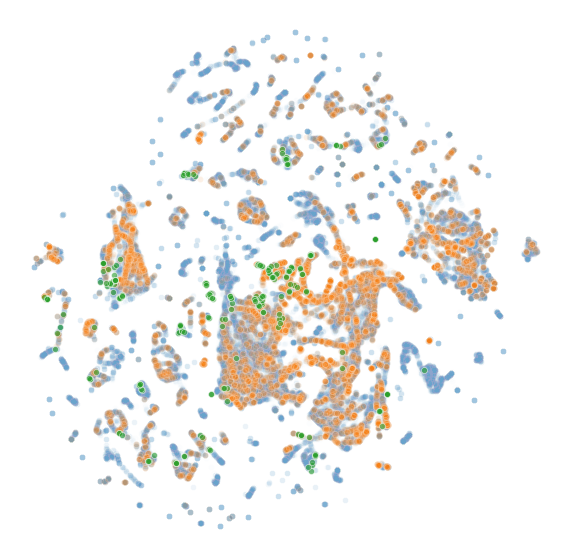

In [9]:
plot_umap_v2(plot_df, colorby, '300K_umap_296835_IE_comm_dft')

In [10]:
colorby
[colorby[0]]

['commensurate']

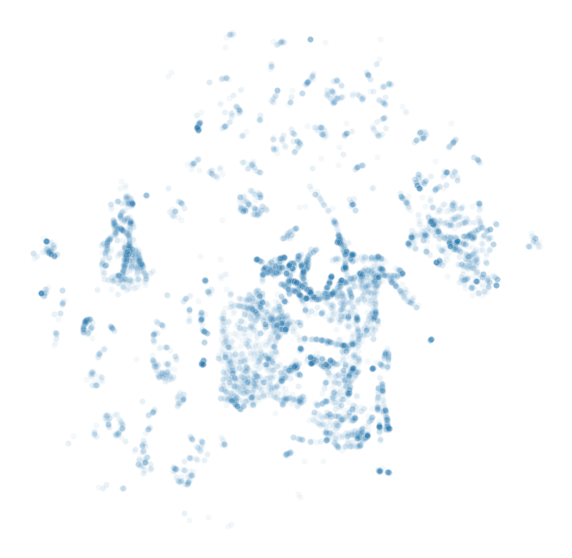

In [11]:
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x='x', y='y',
    palette=sns.color_palette("husl", 2),
    data=plot_df[plot_df[colorby[0]] == True],
    alpha=0.05
)
plt.axis('off')
plt.show()

In [12]:
colorby[0]

'commensurate'

In [13]:
plot_df.shape

(296835, 7)

In [14]:
len(colorby)

2

In [15]:
for i,c in enumerate(colorby): print(i,c)

0 commensurate
1 dft_ie
